###  Load the dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows to understand the data
df.head()
df.info()
df.describe()



C:\Users\Faraz Khan\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [2]:
#  Check Missing Values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###  Split the Data into Training and Testing Sets

In [5]:
from sklearn.model_selection import train_test_split

# Split features and target variable
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable




# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Train a Decision Tree Classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate accuracy
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")


Decision Tree Accuracy: 0.9707792207792207


### Visualize the Decision Tree

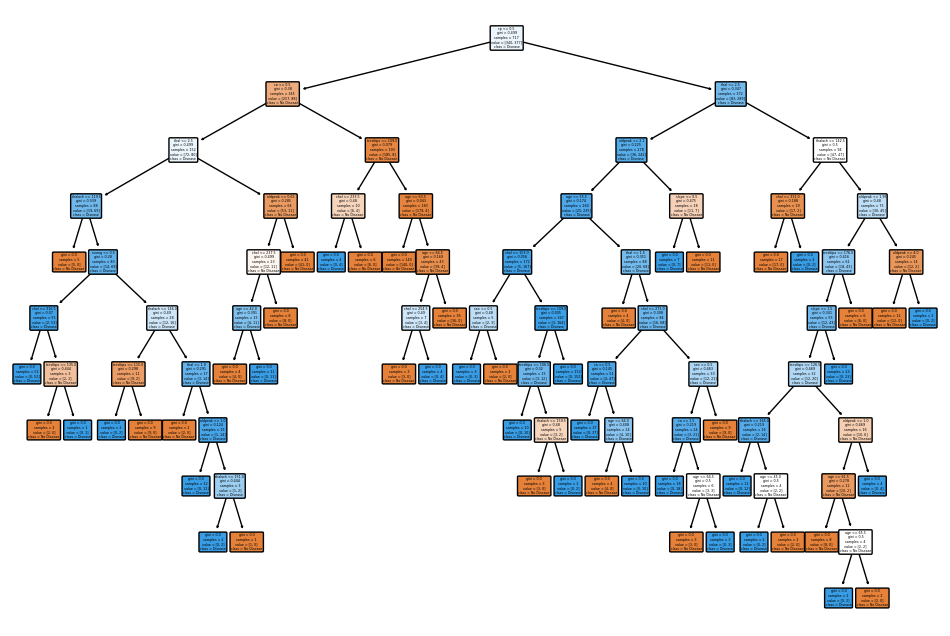

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# Assuming you have already trained the Decision Tree model
# dt = DecisionTreeClassifier(random_state=42)
# dt.fit(X_train, y_train)

# Define feature names from your dataset
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Define class names (target values: 0 = No Disease, 1 = Disease)
class_names = ['No Disease', 'Disease']

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
plt.show()


### Train a Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate accuracy
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")


Random Forest Accuracy: 0.9805194805194806


In [14]:
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")


Decision Tree Accuracy: 0.9707792207792207
Random Forest Accuracy: 0.9805194805194806


### Feature Importance Interpretation for Random Forest

In [15]:
# Get feature importances from Random Forest
feature_importances = rf.feature_importances_

# Display the importance of each feature
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")


age: 0.08555412268789661
sex: 0.02872108242629356
cp: 0.1322740923295331
trestbps: 0.06835600540387823
chol: 0.07987151016374684
fbs: 0.009714339839867534
restecg: 0.018155146361379288
thalach: 0.12503902387206955
exang: 0.04221040250516494
oldpeak: 0.12285161302651727
slope: 0.05133477627752553
ca: 0.12291240900094086
thal: 0.11300547610518671


### Cross-Validation

In [16]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Decision Tree
cv_dt = cross_val_score(dt, X, y, cv=5)
print(f"Cross-validation scores for Decision Tree: {cv_dt}")

# Cross-validation for Random Forest
cv_rf = cross_val_score(rf, X, y, cv=5)
print(f"Cross-validation scores for Random Forest: {cv_rf}")


Cross-validation scores for Decision Tree: [1. 1. 1. 1. 1.]
Cross-validation scores for Random Forest: [1.         1.         1.         1.         0.98536585]
